Analyze the Diabetes patients data finding the descriptive statistics, coorelation and Hypothesis Testing

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

file_path = './diabetes.tsv'
df = pd.read_csv(file_path , sep="\t")

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Compute the Mean and Variance of all the Values

In [11]:
df.describe()

# You can also use the following way to find mean and var
mean, var = df.mean(), df.var()
indices = ['Mean', 'Variance']
pd.DataFrame([mean, var], index=indices)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
Mean,48.51810,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
Variance,171.84661,0.249561,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


### Plot the boxplot for BMI, BP and Y by gender

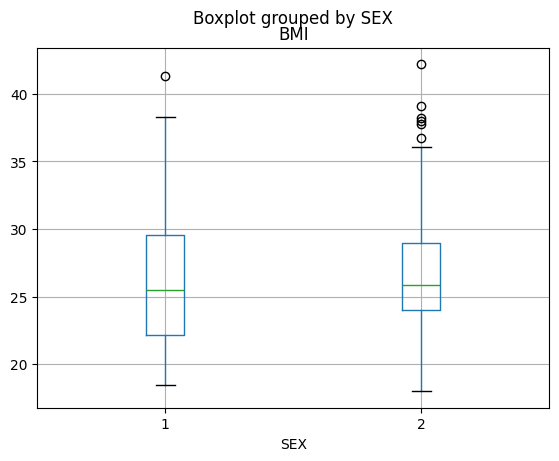

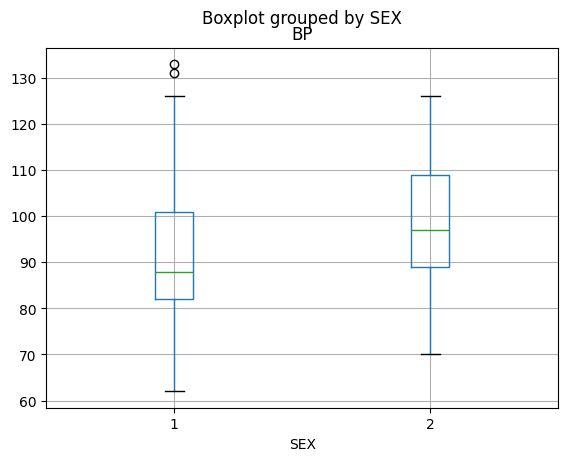

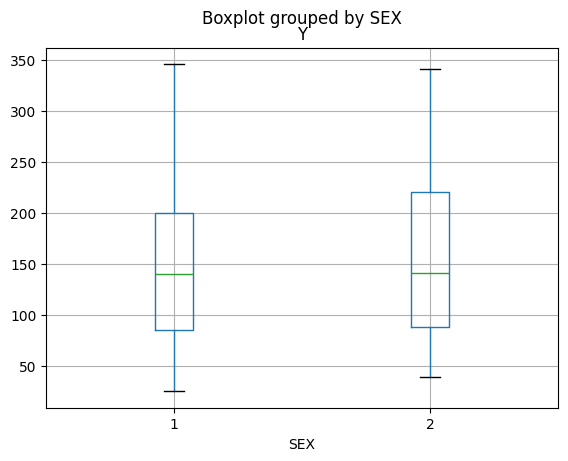

In [14]:
for col in ['BMI', 'BP', 'Y']:
    df.boxplot(column=col, by='SEX')
plt.show()

Distribution of Age, Sex, BMI and Y variables

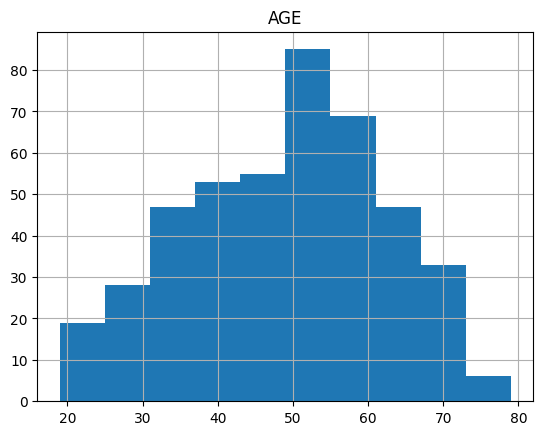

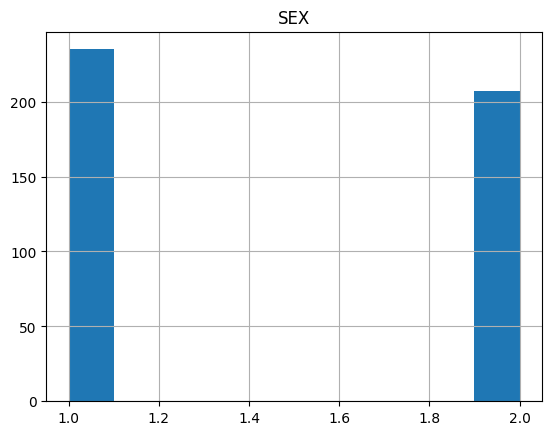

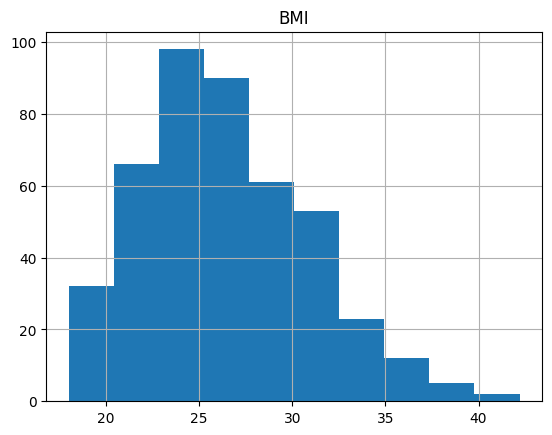

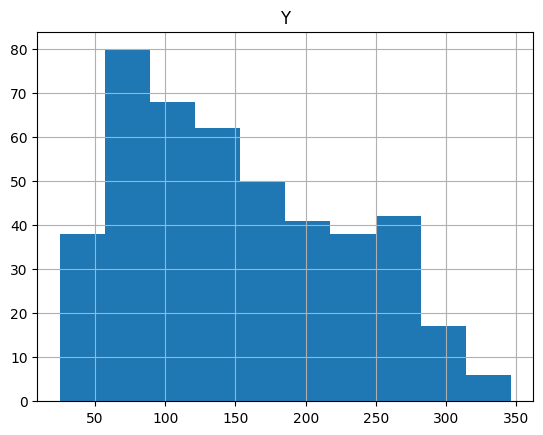

In [17]:
for col in ['AGE', 'SEX', 'BMI', 'Y']:
    df[col].hist()
    plt.title(col)
    plt.show()

We can see the Age and BMI is probably normally distributed, the BMI is unequally distributed

### Find the correlation between variables and Disease prgression Y


In [27]:
df.corr()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


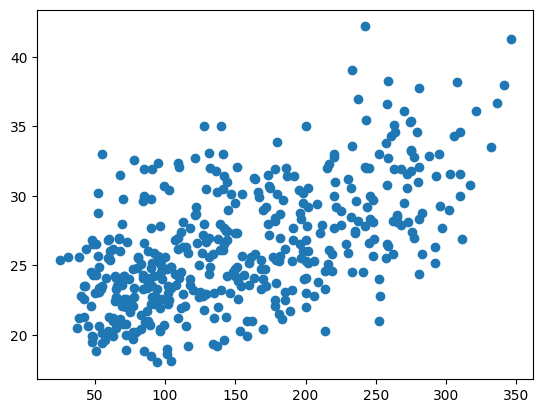

In [35]:
# We can see the BMI has the stronggest correlation, lets plot a scatter chart


plt.scatter(df['Y'], df['BMI'])


plt.show()


Test the hypothesis that the degree of diabetes progression is different between men and women

In [46]:
male = df.loc[df['SEX'] == 1, ['Y']]
female = df.loc[df['SEX'] == 2, ['Y']]
tval, pval = ttest_ind(male, female)

print(f"T value={tval[0]:.2f} \t p-value{pval[0]}")

T value=-0.90 	 p-value0.3664292946519826


The p-value is higher the defined threshold <0.05 in the statistics, which mean there is no strong evidence that sex affects progression of diabetes.